In [31]:
import subprocess
from subprocess import Popen, PIPE
import matplotlib.pyplot as plt
import time

# Introdução 

Este relatório contempla testes feito cm base em 150 entradas diferentes para o problema do caxeiro viajante. 
Alem disso trataremos sobre buscal local, que pode ter sua implementação feita de varias formas, como sequencial, paralelizada, CPU e GPU. NEste relatorio será feita a comparação entre sequencial e paralelizada.


In [67]:
def run(path, inputs):
    start_timer = time.perf_counter()
    process = Popen("./" + path + " " + "< " + inputs, stdout=PIPE, stderr=PIPE, shell=True)
    stdout, stderr = process.communicate()
    end_timer = time.perf_counter()
    return (end_timer - start_timer)


def plot_local_search(n=150):
    BL = []
    BL_openmp = []

    for i in range(0, n):
        BL.append(run("busca-local/buscalocal", f"entradas/in-{i}.txt"))
        BL_openmp.append(run("busca-local/exec", f"entradas/in-{i}.txt"))
    plt.plot(BL, label="Busca Local", color="blue")
    plt.plot(BL_openmp, label="Busca Local com OpenMP", color="red")
    plt.legend()
    plt.xlabel("Cidades")
    plt.ylabel("Tempo (s)")
    plt.title("Tempo de execução")
    plt.show()

Pode-se ver que com o grafico abaixo, ambas aumentam o tempo com a quantidade de cidade, mas a paralelizada que é a linha vermelha, sempre está com tempos menores, ou seja podemos dizer que é mais eficiente.

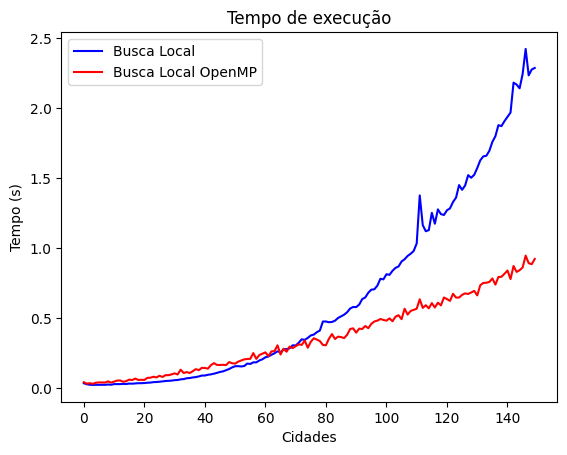

In [68]:
plot_local_search()